In [16]:
!pip install -q pandas matplotlib seaborn

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
from google.colab import drive

In [19]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preprocessed Food Stocks Time Series Data

In [20]:
all_stocks_and_etfs_path = "/content/drive/MyDrive/Research @ CMU/Citadel Datathon/Datathon Data/all_stock_and_etfs.csv"

# Reading the file
with open(all_stocks_and_etfs_path, 'r') as file:
    content = file.read()

In [21]:
df = pd.read_csv(all_stocks_and_etfs_path, parse_dates=['Date-Time'])

In [22]:
# print(df.head())
# print(df.info())

In [23]:
# Group by label
grouped = df.groupby('Ticker_Symbol')

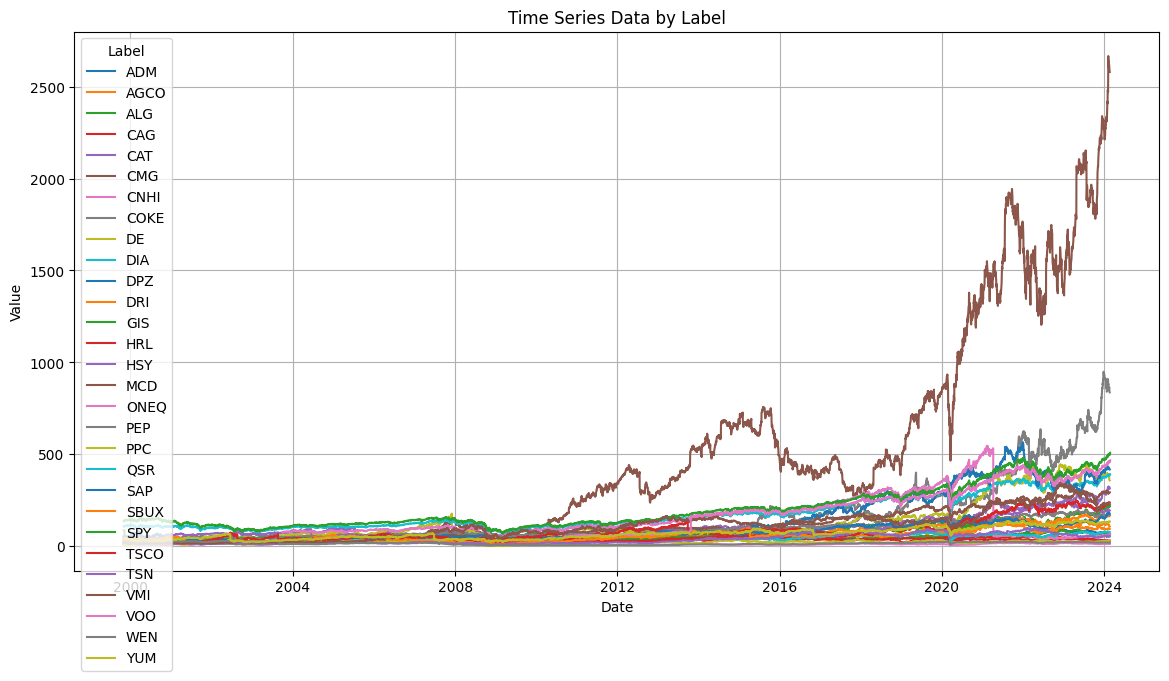

In [24]:
import matplotlib.pyplot as plt

# Create a plot for each label
plt.figure(figsize=(14, 7))

for label, group in grouped:
    plt.plot(group['Date-Time'], group['Close'], label=label)

plt.title('Time Series Data by Label')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Label')
plt.grid(True)
plt.show()

In [25]:
# Compute descriptive statistics for each time series
# statistics = grouped['Close'].describe()
# print(statistics)

# Seasonal Decomposition

In [26]:
!pip install -q statsmodels

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL # Import STL from the correct submodule
from statsmodels.tsa.stattools import adfuller # Import adfuller from the correct submodule

In [28]:
preprocessed_tickers = df['Ticker_Symbol'].unique()
# preprocessed_tickers = preprocessed_tickers[preprocessed_tickers != 'CNHI']
print(preprocessed_tickers)

['HRL' 'VOO' 'ADM' 'AGCO' 'DIA' 'PEP' 'QSR' 'TSCO' 'ONEQ' 'PPC' 'CAG'
 'DRI' 'HSY' 'CAT' 'SBUX' 'CMG' 'COKE' 'CNHI' 'SPY' 'DE' 'TSN' 'GIS' 'WEN'
 'YUM' 'VMI' 'MCD' 'SAP' 'DPZ' 'ALG']


In [39]:
def seasonal_decompose(label, grouped):
  # Select a specific label
  label_to_analyze = label
  data = grouped.get_group(label_to_analyze)
  print(data.head())

  # Convert 'Date-Time' to datetime and set as index
  data.loc[:, 'Date-Time'] = pd.to_datetime(data['Date-Time']) # Use .loc to modify the DataFrame
  data = data.set_index('Date-Time')

  # Perform seasonal decomposition using statsmodels STL
  stl = STL(data['Close'], period=13)  # Adjust period as needed
  result = stl.fit()

  # Extract components
  trend = result.trend
  seasonal = result.seasonal
  resid = result.resid

  print(trend)
  print(seasonal)
  print(resid)

  # Check for and handle infinite or NaN values in residuals
  resid = resid.replace([np.inf, -np.inf], np.nan).dropna() # Replace infinite values with NaN and then forward fill

  # Plot the results
  plt.figure(figsize=(14, 8))

  plt.subplot(4, 1, 1)
  plt.plot(data.index, data['Close'], label='Original')
  plt.title('Seasonal Decomposition')
  plt.ylabel('Closing Value')
  plt.grid(True)

  plt.subplot(4, 1, 2)
  plt.plot(data.index, trend, label='Trend', color='orange')
  plt.ylabel('Trend')
  plt.grid(True)

  plt.subplot(4, 1, 3)
  plt.plot(data.index, seasonal, label='Seasonal', color='green')
  plt.ylabel('Seasonal')
  plt.grid(True)

  plt.subplot(4, 1, 4)
  plt.plot(data.index, resid, label='Residual', color='red')
  plt.ylabel('Residual')
  plt.xlabel('Date')
  plt.grid(True)

  plt.tight_layout()
  plt.show()

  # Perform ADF test
  adf_result = adfuller(resid)
  adf_statistic = adf_result[0]
  p_value = adf_result[1]
  critical_values = adf_result[4]

  if p_value < 0.05:
    print(f'{label} is stationary with p-value: {p_value}')

   Date-Time   Open     High      Low  Close   Volume Ticker_Symbol
0 2024-02-20  29.09  29.7100  29.0001  29.44  2673889           HRL
1 2024-02-16  29.01  29.1700  28.7650  28.99  5655091           HRL
2 2024-02-15  28.94  29.2210  28.8500  29.11  2380372           HRL
3 2024-02-14  28.76  28.8254  28.5100  28.80  2690379           HRL
4 2024-02-13  29.56  29.8000  28.6350  28.72  4173650           HRL
Date-Time
2024-02-20    29.739048
2024-02-16    29.753915
2024-02-15    29.769540
2024-02-14    29.785985
2024-02-13    29.803508
                ...    
1999-11-05    42.332875
1999-11-04    42.340402
1999-11-03    42.348265
1999-11-02    42.356547
1999-11-01    42.365131
Name: trend, Length: 6114, dtype: float64
Date-Time
2024-02-20    0.047351
2024-02-16   -0.081510
2024-02-15    0.006596
2024-02-14   -0.082437
2024-02-13   -0.522956
                ...   
1999-11-05    0.608099
1999-11-04   -1.328033
1999-11-03   -0.198242
1999-11-02   -0.315906
1999-11-01    0.493632
Name: season,

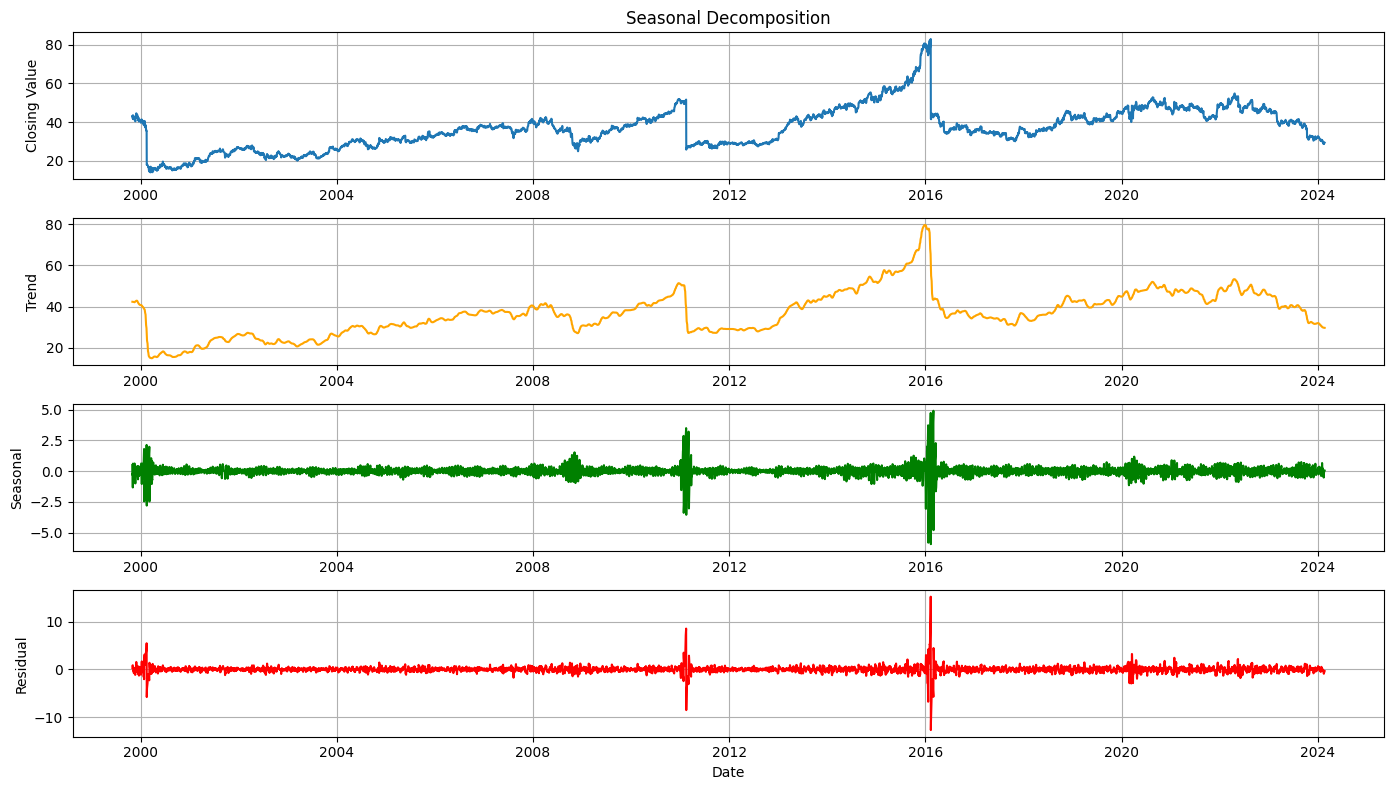

HRL is stationary with p-value: 0.0


In [41]:
seasonal_decompose("HRL", grouped)